In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url="../data/processed/sorted_output.csv"
parse_dates=["time"]
ds = pd.read_csv(url, parse_dates=parse_dates)

In [3]:
ds.shape

(6038706, 5)

In [4]:
ds["sensor"].value_counts()

DHT22     1522253
HTU21     1510105
BMP280    1504469
DHT11     1501874
DM280           5
Name: sensor, dtype: int64

In [5]:
ds.sample(10)

,time,sensor,H,P,T
961517,2018-01-02 07:35:18,BMP280,NaN,1024.81,17.17
1887483,2018-01-18 20:31:12,DHT22,NaN,NaN,24.00
4891257,2018-02-28 07:15:14,HTU21,29.0,NaN,20.02
5768902,2018-03-10 09:27:41,HTU21,37.8,NaN,23.82
538375,2017-12-28 11:48:39,BMP280,NaN,1008.37,16.56
4127679,2018-02-15 04:33:10,DHT22,1.0,NaN,22.90
5012147,2018-03-01 16:49:57,DHT11,34.0,NaN,23.00
4642977,2018-02-21 09:38:23,BMP280,NaN,1007.40,25.16
2966265,2018-02-01 17:19:08,HTU21,33.6,NaN,22.34
5779822,2018-03-10 12:26:17,DHT11,34.0,NaN,24.00


In [6]:
ds.describe(include="all")

,time,sensor,H,P,T
count,6038706,6038706,4.288839e+06,1.422792e+06,5.711640e+06
unique,5943769,5,NaN,NaN,NaN
top,2018-03-13 11:35:48,DHT22,NaN,NaN,NaN
freq,4,1522253,NaN,NaN,NaN
first,2017-12-19 14:07:18,NaN,NaN,NaN,NaN
last,2018-03-13 11:42:12,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.336465e+01,1.015690e+03,2.201185e+01
std,NaN,NaN,1.617257e+01,1.011069e+01,2.631197e+00
min,NaN,NaN,1.000000e+00,9.856200e+02,1.500000e+01
25%,NaN,NaN,1.000000e+00,1.008670e+03,2.063000e+01


In [7]:
# Analizing only Humidity information
dsh = ds[pd.notnull(ds["H"])]
dsh = dsh[dsh["H"] > 1]
dsh = dsh[dsh["H"]<99.9]
dsh = dsh[dsh["time"]>"2017-12-22"]
dsh = dsh[["time","sensor","H"]]
dsh["time"] = dsh["time"].values.astype('<M8[m]')

In [8]:
dsh.shape

(2848495, 3)

In [9]:
dsh["sensor"].value_counts()

HTU21    1428193
DHT11    1420302
Name: sensor, dtype: int64

In [10]:
dsh.tail(10)

,time,sensor,H
6038686,2018-03-13 11:41:00,DHT11,33.0
6038688,2018-03-13 11:41:00,HTU21,30.8
6038690,2018-03-13 11:41:00,DHT11,33.0
6038692,2018-03-13 11:41:00,HTU21,30.8
6038694,2018-03-13 11:42:00,DHT11,33.0
6038696,2018-03-13 11:42:00,HTU21,30.8
6038698,2018-03-13 11:42:00,DHT11,33.0
6038700,2018-03-13 11:42:00,HTU21,31.0
6038702,2018-03-13 11:42:00,DHT11,33.0
6038705,2018-03-13 11:42:00,HTU21,33.6


In [11]:
dsh.describe(include="all")

,time,sensor,H
count,2848495,2848495,2.848495e+06
unique,101250,2,NaN
top,2018-01-16 04:23:00,HTU21,NaN
freq,30,1428193,NaN
first,2017-12-22 08:12:00,NaN,NaN
last,2018-03-13 11:42:00,NaN,NaN
mean,NaN,NaN,3.467088e+01
std,NaN,NaN,3.619587e+00
min,NaN,NaN,1.970000e+01
25%,NaN,NaN,3.370000e+01


In [12]:
dshv = pd.pivot_table(dsh, index=["time"], columns=["sensor"], values="H")
dshv.reset_index(inplace=True)

In [13]:
dshv.sample(10)

sensor,time,DHT11,HTU21
8428,2017-12-28 05:07:00,37.142857,39.500000
48829,2018-02-01 01:18:00,35.000000,34.700000
6176,2017-12-26 15:35:00,36.071429,39.435714
26489,2018-01-15 12:41:00,34.000000,28.686667
73774,2018-02-18 09:31:00,35.000000,34.500000
16056,2018-01-02 12:15:00,37.000000,46.314286
61057,2018-02-09 13:06:00,34.000000,23.700000
97243,2018-03-10 16:56:00,34.000000,37.200000
56169,2018-02-06 03:38:00,36.000000,39.700000
53930,2018-02-04 14:19:00,35.000000,33.483333


In [14]:
dshv.describe(include="all")

sensor,time,DHT11,HTU21
count,101250,101049.000000,101243.000000
unique,101250,NaN,NaN
top,2017-12-24 09:11:00,NaN,NaN
freq,1,NaN,NaN
first,2017-12-22 08:12:00,NaN,NaN
last,2018-03-13 11:42:00,NaN,NaN
mean,NaN,34.999537,34.344417
std,NaN,1.158897,4.943498
min,NaN,31.083333,19.806667
25%,NaN,34.000000,30.500000


In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

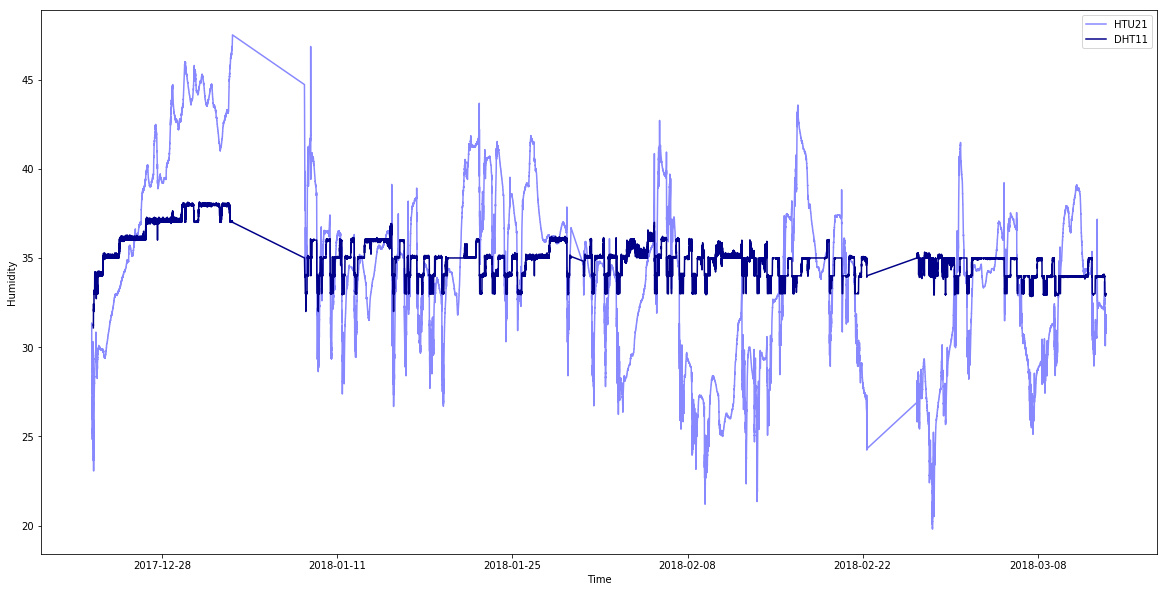

In [16]:
plt.plot(dshv["time"], dshv["HTU21"], "#8888ff", label="HTU21")
plt.plot(dshv["time"], dshv["DHT11"], "#000088", label="DHT11")
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.legend()

In [17]:
# Only two sensors have humidity measurements
# DHT11 has low precision measurement